# Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset


In [5]:
df = pd.read_csv('winequality-red.csv')
X = df.drop('quality',axis =1)
y = df['quality'].apply(lambda y_value:1 if y_value>=6.5 else 0)


In [6]:
df.shape

(1599, 12)

In [7]:
#Seeing the first five rows in the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Checking for null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

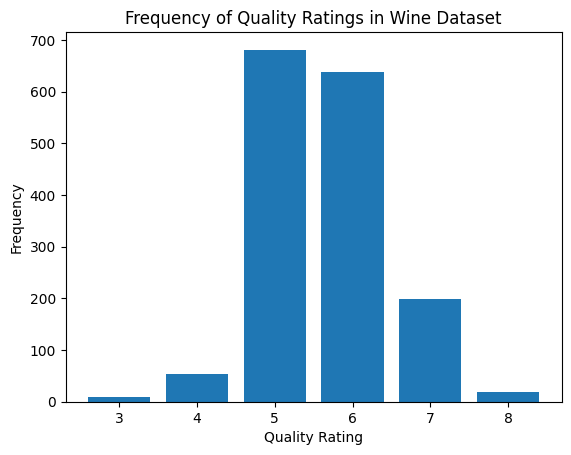

In [9]:
# Create a bar chart of the frequency of each quality rating
plt.bar(df['quality'].unique(), df['quality'].value_counts().values)
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Quality Ratings in Wine Dataset')
plt.show()

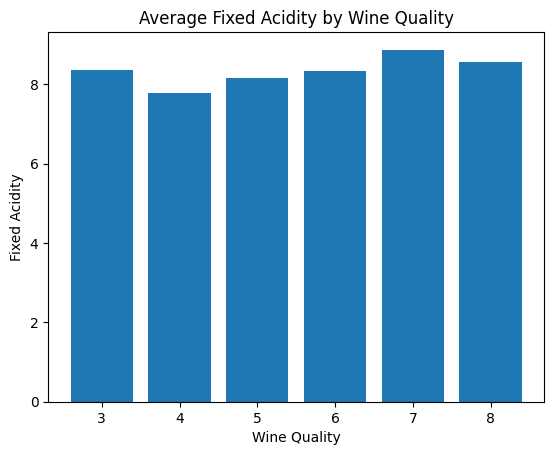

In [10]:
df_grouped = df.groupby('quality')['fixed acidity'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['fixed acidity'])
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()
#not much to infer from here, correlation of fixed acidity with the quality seems pretty less

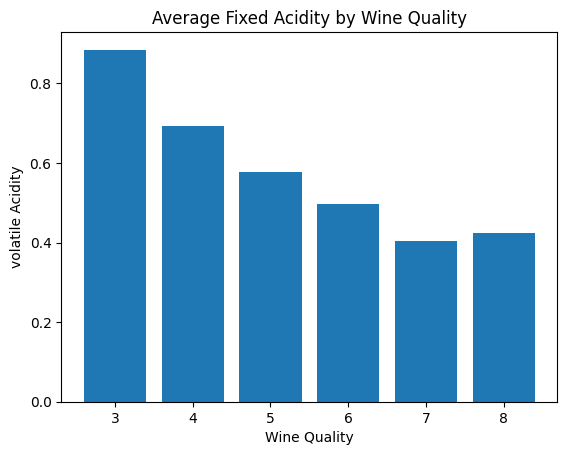

In [11]:
df_grouped = df.groupby('quality')['volatile acidity'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['volatile acidity'])
plt.xlabel('Wine Quality')
plt.ylabel('volatile Acidity')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

#can infer that higher the volatile acidity lower is the wine quality.

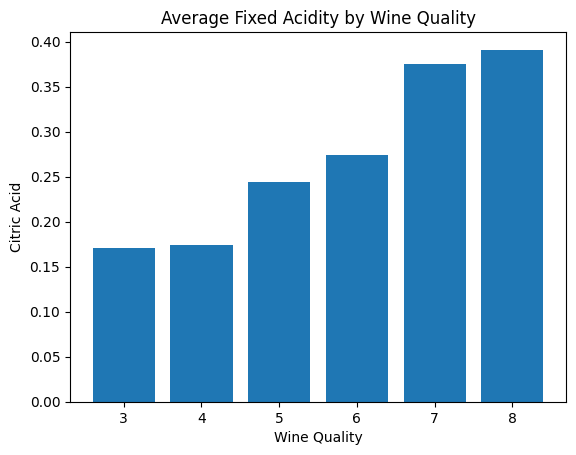

In [12]:
df_grouped = df.groupby('quality')['citric acid'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['citric acid'])
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

#seems like a positive correlation of the wine quality with citric acid,let's check.

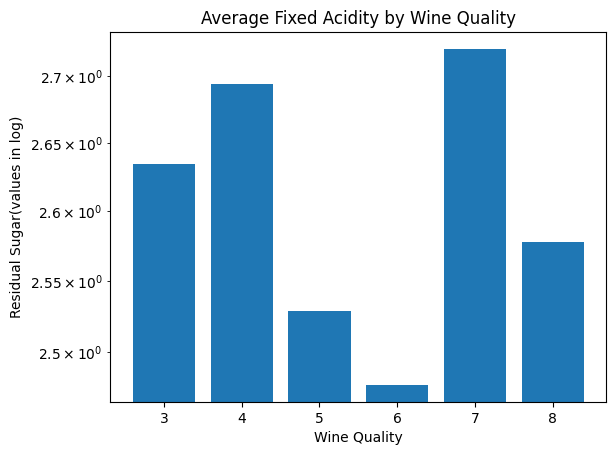

In [13]:
df_grouped = df.groupby('quality')['residual sugar'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['residual sugar'])
plt.yscale('log')
plt.xlabel('Wine Quality')
plt.ylabel('Residual Sugar(values in log)')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

#cant comment much from here again.

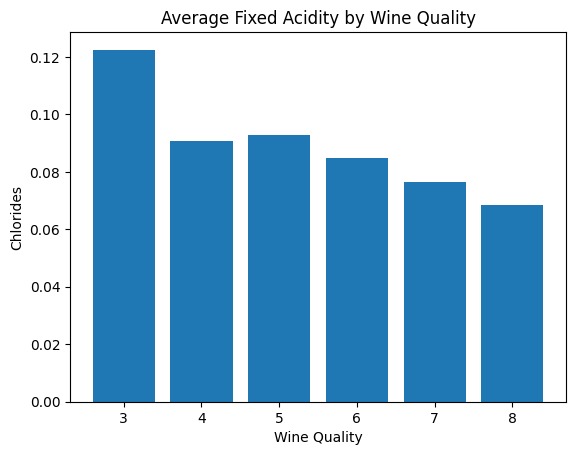

In [14]:
df_grouped = df.groupby('quality')['chlorides'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['chlorides'])
plt.xlabel('Wine Quality')
plt.ylabel('Chlorides')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

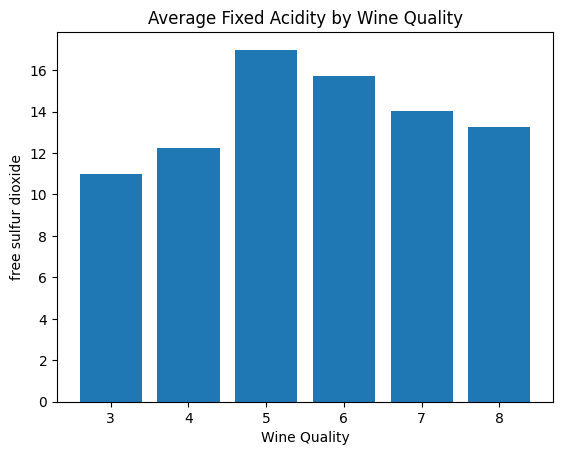

In [15]:
df_grouped = df.groupby('quality')['free sulfur dioxide'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['free sulfur dioxide'])
plt.xlabel('Wine Quality')
plt.ylabel('free sulfur dioxide')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

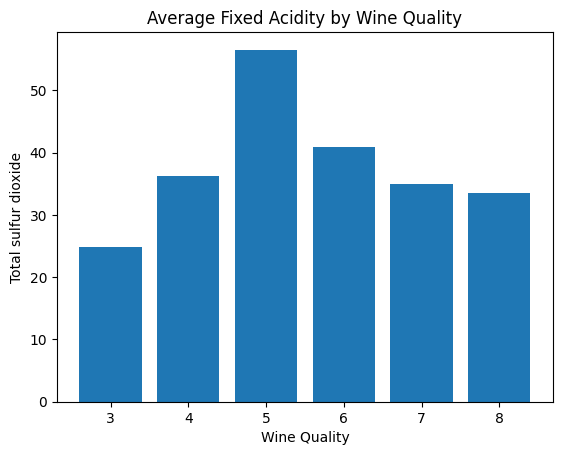

In [16]:
df_grouped = df.groupby('quality')['total sulfur dioxide'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['total sulfur dioxide'])
plt.xlabel('Wine Quality')
plt.ylabel('Total sulfur dioxide')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

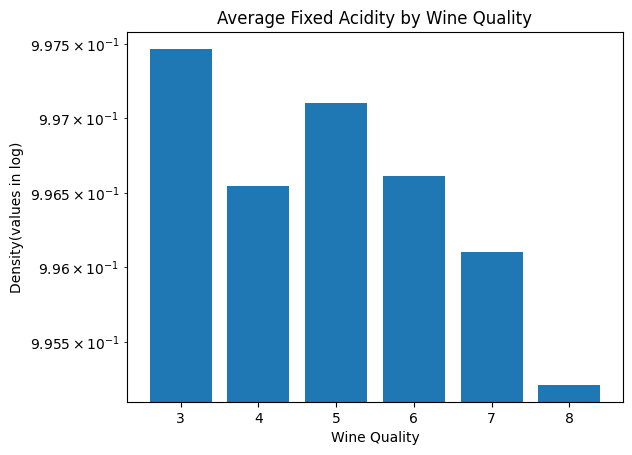

In [17]:
df_grouped = df.groupby('quality')['density'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['density'])
plt.yscale('log')
plt.xlabel('Wine Quality')
plt.ylabel('Density(values in log)')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

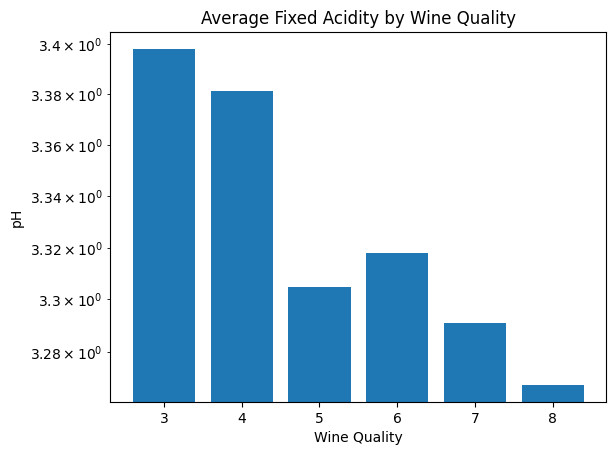

In [18]:
df_grouped = df.groupby('quality')['pH'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['pH'])
plt.yscale('log')
plt.xlabel('Wine Quality')
plt.ylabel('pH')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

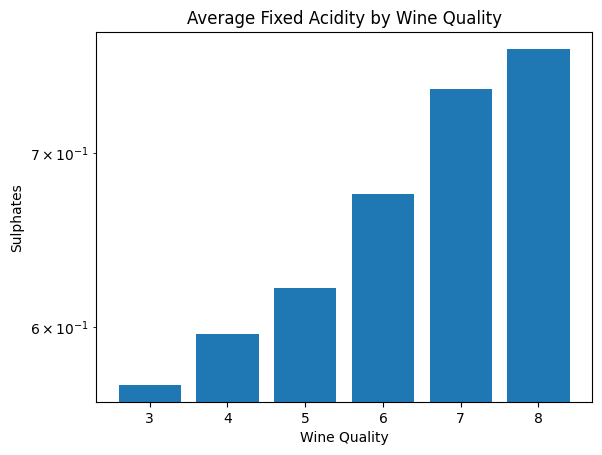

In [19]:
df_grouped = df.groupby('quality')['sulphates'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['sulphates'])
plt.yscale('log')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()

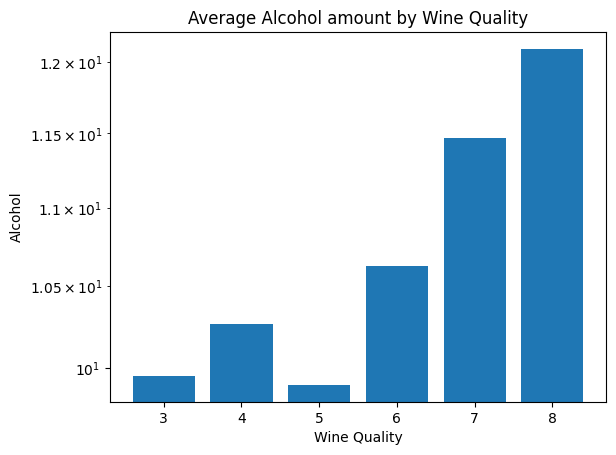

In [20]:
df_grouped = df.groupby('quality')['alcohol'].mean().reset_index()
plt.bar(df_grouped['quality'], df_grouped['alcohol'])
plt.yscale('log')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.title('Average Alcohol amount by Wine Quality')
plt.show()

<Axes: >

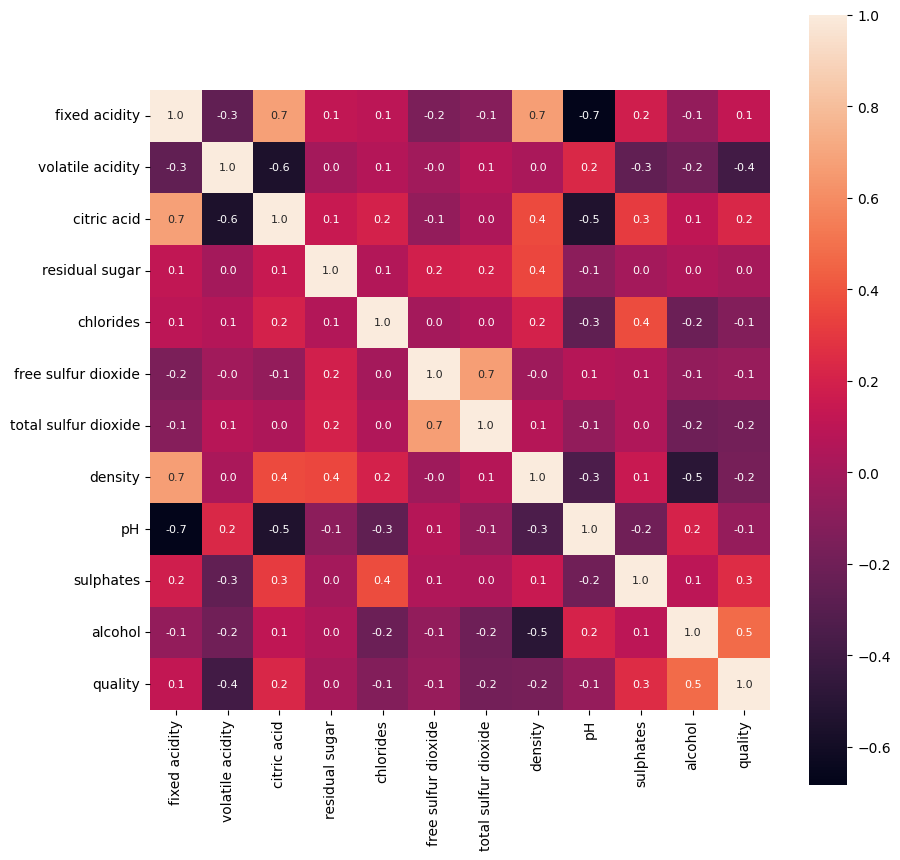

In [21]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8})


# Splitting the dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)


# Training the dataset

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,random_state = 3)
regressor.fit(X,y)

RandomForestRegressor(random_state=3)

# Making predictions

In [36]:
y_pred = regressor.predict(X_test)

# Checking for the accuracy score

In [37]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy)

0.9274955966019796


# Making a prediction for a random data from the dataset

In [40]:
X_test_prediction = regressor.predict([[7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5]])
if(X_test_prediction >= 6.5):
  print("1(Good Quality Wine)")
else:
  print("0:Not a good quality wine")




0:Not a good quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(




7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5 were the features and 5 was the quality which means it was bad

